# 2 Week : Optimization 과제

# Q1. Optimizer 실습

- 수업에서 배운 Optimizer를 직접 구현을 해보는 것을 목표로 합니다
- Q1은 크게 두가지 파트로 나뉘어져 있습니다.
- 1. $f(x,y)$를 미분한 $∇f(x,y)$를 찾기 2. 각 optimizer 구현하기
- 각 코드를 구현 후 시각화 코드를 입력해놓았으니 그대로 출력 하시면 됩니다
//
* 유의사항 : 시각화를 위해 결과의 형식을 지정해놓았습니다. 이와 다르게 하시면 출력이 제대로 안 될 수 있으니 이에 맞게 지정해주세요 :)


## Q1.1 $\nabla f(x,y)$를 구해주세요

✨유의사항 : np.array$([ \nabla_x f(x,y),\nabla_y f(x,y)])$ 형태로 return 해주세요  

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# 함수를 정의
def f(x, y):
    return -x**2 + y**2

# 그래디언트 정의
def grad_f(x, y):
    dx = -2*x
    dy = 2*y
    return np.array([  dx   ,     dy   ])


## Q1.2 각 Optimizer를 구현해주세요

- **SGD**: $\theta_{t+1} = \theta_t - \eta\cdot \nabla f(\theta_t)$

- **Momentum**:
    - $v_t = \gamma \cdot v_{t-1} + \eta \cdot\nabla f(\theta_t)$
    - **파라미터 업데이트** :  $\theta_{t+1} = \theta_t - v_t$

- **RMSprop**:
    - $g_t = \rho \cdot g_{t-1} + (1-\rho)\cdot g_t$
   
    - **파라미터 업데이트** :  $\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{E[g^2]_t + \epsilon}} \nabla f(\theta_t)$

- **Adam**:
    - $m_t = \beta_1 m_{t-1} + (1 - \beta_1) \nabla f(\theta_t)$
    - $v_t = \beta_2 v_{t-1} + (1 - \beta_2) (\nabla f(\theta_t))^2$
    - $\hat{m}_t = \frac{m_t}{1 - \beta_1^t}$
    - $\hat{v}_t = \frac{v_t}{1 - \beta_2^t}$
    - **파라미터 업데이트** :  $\theta_{t+1} = \theta_t - \frac{\eta \hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}$





✨ 유의사항 :


1. 각 코드에서 ***어떤 파트인지 주석***으로 적어주세요 \\
ex) \\
`theta = theta + update  ## 파라미터 업데이트 항` \\
`momentum = ~~~~ ## momentum 항`
2.   각 함수의 return은 update 된 ***x,y***로 넣어주세요 \\
`ex) return x - lr * gradient , y - lr * gradient`
3.   lr / rho / beta 와 같은 각 값은 ***최대한 건들이지 말아주세요***. \\
시각화 하기에 좋은 파라미터로 맞춰놔서 시각화가 이상해질수도 있어요 :(
4. 정 모르시겠다면 Q2. 에 SGD 구현 예시를 해놓았습니다. Q2 처럼 해주시면 됩니다

In [71]:
# Momentum, RMSprop, Adam 알고리즘을 위한 변수 초기화
m = np.array([0.0, 0.0]) # momentum의 초기값 설정
Eh= np.array([0.0, 0.0]) # 지수이동 평균값의 초기값 설정
m1= np.array([0.0, 0.0]) # 1차 모멘텀의 초기값 설정
v= np.array([0.0, 0.0]) # 2차 모멘텀의 초기값 설정

In [72]:
def sgd(x, y, lr=0.1):

    x = x - (lr * grad_f(x,y)[0]) # x 파라미터 업데이트 항
    y = y - (lr * grad_f(x,y)[1]) # y 파라미터 업데이트 항

    return np.array([x,y])# 결과값 리턴

def momentum(x, y, lr=0.1, momentum=0.001):


    m[0]= (momentum * m[0]) + (lr * grad_f(x,y)[0]) # 매개변수 x의 momentum 업데이트
    m[1]= (momentum * m[1]) + (lr * grad_f(x,y)[1]) # 매개변수 y의 momentum 업데이트

    x= x - m[0] # 매개변수 x 업데이트
    y= y - m[1] # 매개변수 y 업데이트

    return np.array([x,y]) # 결과값 리턴

def rmsprop(x, y, lr=0.1, rho=0.9, epsilon=1e-6):


    Eh[0]= (rho * Eh[0]) + ((1-rho) * (grad_f(x,y)[0]**2)) # 매개변수 x의 지수이동 평균값 업데이트
    Eh[1]= (rho * Eh[1]) + ((1-rho) * (grad_f(x,y)[1]**2)) # 매개변수 y의 지수이동 평균값 업데이트

    x= x - (lr / np.sqrt(Eh[0] + epsilon)) * grad_f(x,y)[0] # 매개변수 x 업데이트
    y= y - (lr / np.sqrt(Eh[1] + epsilon)) * grad_f(x,y)[1] # 매개변수 y 업데이트

    return np.array([x,y]) # 결과값 리턴

def adam(x, y, lr=0.1, beta1=0.9, beta2=0.9, epsilon=1e-8):


    m1[0]= (beta1 * m1[0]) + ((1-beta1) * grad_f(x,y)[0]) # 매개변수 x의 1차 모멘텀 업데이트
    m1[1]= (beta1 * m1[1]) + ((1-beta1) * grad_f(x,y)[1]) # 매개변수 y의 1차 모멘텀 업데이트

    v[0]= (beta2 * v[0]) + ((1-beta2) * (grad_f(x,y)[0]**2)) # 매개변수 x의 2차 모멘텀 업데이트
    v[1]= (beta2 * v[1]) + ((1-beta2) * (grad_f(x,y)[1]**2)) # 매개변수 y의 2차 모멘텀 업데이트

    mx_h = m1[0] / (1 - beta1) # 매개변수 x의 1차 모멘텀의 보정값
    my_h = m1[1] / (1 - beta1) # 매개변수 y의 1차 모멘텀의 보정값

    vx_h = v[0] / (1 - beta2) # 매개변수 x의 2차 모멘텀의 보정값
    vy_h = v[1] / (1 - beta2) # 매개변수 y의 2차 모멘텀의 보정값

    x= x - (lr * mx_h) / (np.sqrt(vx_h) + epsilon) # 매개변수 x 업데이트
    y= y - (lr * my_h) / (np.sqrt(vy_h) + epsilon) # 매개변수 y 업데이트

    return np.array([x,y]) # 결과값 리턴


## Q1.3 시각화를 통한 특성 파악

- 어떤 Optimizer가 좋은지에 대한 정답은 없습니다.
- 그냥 결과를 보시고 각 Optimizer가 학습된 특성을 적어주세요 ex) 기울기를 착실하게 따라간다.



✨유의사항

- Momentum / RMSprop / Adam의 초기파라미터 v,g,m 및 t 도 0으로 맞춰주세요 ( 사용자가 짠 코드에 따라 변수명은 달라져도 됩니다)
- 다르게 나올 경우 예시와 같은 사진으로 최대한 맞춰주세요 :)






================================================================================

***Answer)***



SGD : Momentum과 RMSProp의 중간 단계에 있는 모습을 보인다. 수렴 속도와 학습 속도 모두 평균적인 빠르기로 진행된다.

Momentum : 학습 과정에 따라서 점차 수렴되는 속도가 빨라지는 모습을 보인다. 때문에 과적합이나 안정성 측면에서 문제를 야기할 수 있을 것 같다.

RMSProp : 일정한 간격으로 학습이 진행되어 안정적이지만, 수렴 속도가 느려 안장점에 도달할 확률이 높을 것으로 보인다.

Adam : RMSprop보다 빠른 수렴 속도를 보이며 동시에 안정적인 학습 속도를 관측할 수 있다.

================================================================================

In [29]:
# 시각화 전 초기 파라미터 세팅하기 (예시)
# Momentum, RMSprop, Adam 알고리즘을 위한 변수 초기화 - 모두 0으로 초기화시켜주세요
v = np.array([0.0, 0.0])
g = np.array([0.0, 0.0])
m = np.array([0.0, 0.0])
t = 0

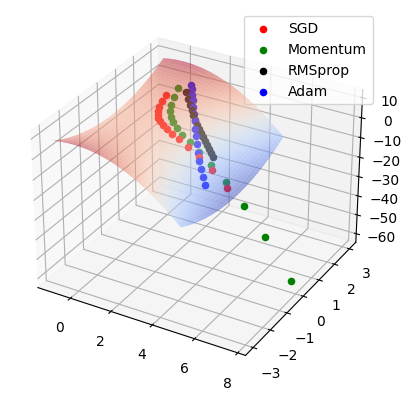

In [73]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = np.linspace(-1., 5, 100)
Y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)
ax.plot_surface(X, Y, Z, cmap='coolwarm', alpha=0.5,zorder=0)

# 초기 시작점을 설정
points = {
    'SGD': [0.3, 2],
    'Momentum': [0.5, 2.5],
    'RMSprop': [0.7, 2.3],
    'Adam': [0.9, 2.4]
}


# 각 알고리즘의 색상을 설정
colors = {'SGD': 'red', 'Momentum': 'green', 'RMSprop': 'black', 'Adam': 'blue'}

# 각 알고리즘을 실행하고 결과를 플롯에 추가합니다.
steps = 15
for step in range(steps):
    for key, (x, y) in points.items():
        if key == 'SGD':
            x, y = sgd(x, y)
        elif key == 'Momentum':
            x, y = momentum(x, y)
        elif key == 'RMSprop':
            x, y = rmsprop(x, y)
        elif key == 'Adam':
            x, y = adam(x, y)
        points[key] = [x, y]
        ax.scatter(x, y, f(x, y), color=colors[key], label=key if step == 0 else "")

# 범례 추가
ax.legend()
plt.show()

#Q2. Learning Rate

- Learning Rate의 효과에 대해 알아봅니다
- 여러 local minimum이 있는 함수에 갇히지 않고 global minimum로 갈 수 있는 learning rate를 찾는 것을 목표로 합니다.

## Q2.1 $\nabla f(x,y)$를 구해주세요

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function with local and global minima
def f(x, y):
    return (x**2 + y**2 - 1)**2 + 1 * np.sin(5 * x) + 1 * np.sin(5 * y)

# Define the gradients
def grad_f(x, y):
    dx = 4 * x * (x**2 + y**2 - 1) + 5 * np.cos(5 * x)
    dy = 4 * y * (x**2 + y**2 - 1) + 5 * np.cos(5 * y)
    return np.array([dx, dy])


## Q2.2 적절한 learning rate를 찾아주세요

### learning_rate를 정해주세요

- 범위는 (0.0001~0.05) 입니다.
- learning_rate는 최대 세 개까지 넣을 수 있게 해놨습니다.
- 위 범위에서 50에포크동안 local minimum에 빠지지 않고 global minimum로 가는 learning rate를 코드 실행 / 시각화를 통해 찾아주세요
- global minimum으로 가는 learning_rate 중 가장 작은 learning rate를 적어주세요




================================================================================

***최적의 learning_rate***  : 0.017

================================================================================

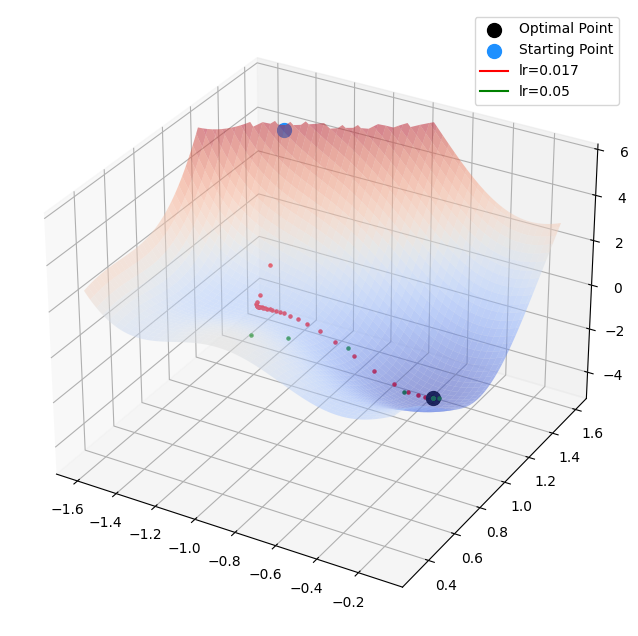

In [75]:

learning_rates = [0.017, 0.05]




# =================================================
# 시각화 세팅 파트 (그냥 실행시켜주시면 됩니다) ===
# =================================================
# Gradient Descent Algorithm (SGD)
def sgd(x, y, lr=0.1):
    grad = grad_f(x, y)
    return x - lr * grad[0], y - lr * grad[1]

# Initialize the plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
X = np.linspace(-1.6, -0.1, 100)
Y = np.linspace(0.3, 1.6, 100)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)
# Set the z-axis limit
zlim_min, zlim_max = -5, 6
ax.set_zlim(zlim_min, zlim_max)

# Mask Z values outside the zlim range
Z = np.where((Z >= zlim_min) & (Z <= zlim_max), Z, np.nan)

ax.plot_surface(X, Y, Z, cmap='coolwarm', alpha=0.5, zorder=0)

ax.scatter(-0.3146579, 0.94397367, f(0.94397367, -0.3146579), color='black', s=100, zorder=3, label='Optimal Point')
ax.scatter(-1.3, 1.3, f(-1.3, 1.3), color='dodgerblue', s=100, zorder=3, label='Starting Point')

# Initialize the points with slight variations
initial_points = [
    [-1.3, 1.3],
    [-1.25, 1.35],
    [-1.35, 1.25]
]

# Colors for different learning rates
colors = ['red', 'green', 'blue']
labels = [f'lr={lr}' for lr in learning_rates]

# ===============================================
# Optimizer 파트 , 에포크는 50으로 고정합니다 ===
# ===============================================

steps = 50
for lr, color, label, initial_point in zip(learning_rates, colors, labels, initial_points):
    x, y = initial_point

    for step in range(steps):
        x, y = sgd(x, y, lr)
        ax.scatter(x, y, f(x, y), color=color, s=5, zorder=4)
    ax.plot([], [], color=color, label=label)

# Add legend
ax.set_zlim(-5, 6)
ax.legend()
plt.show()


In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# 초기값 설정
initial_points = [-1.3, 1.3, f(-1.3, 1.3)]

# Optimal point 정의
optimal_point = [-0.3146579, 0.94397367, f(0.94397367, -0.3146579)]

# 학습률 범위 설정
learning_rates = np.arange(0.001, 0.051, 0.001)

# 에포크 수
steps = 50

# 최종적으로 optimal point에 도달한 learning rate 저장
successful_lrs = []

# 최적화 수행 및 학습률 검증
for lr in learning_rates:
    x, y, z = initial_points

    for step in range(steps):
        x, y = sgd(x, y, lr)
        z = f(x, y)

    # 최종 점이 optimal point에 도달했는지 확인
    distance = np.sqrt((x - optimal_point[0])**2 + (y - optimal_point[1])**2 + (z - optimal_point[2])**2)
    if distance < 0.000001:
        successful_lrs.append(lr)

# 결과 출력
df = pd.DataFrame(successful_lrs, columns=['Learning Rate'])
print(df)

    Learning Rate
0           0.017
1           0.018
2           0.019
3           0.020
4           0.021
5           0.022
6           0.023
7           0.024
8           0.025
9           0.026
10          0.027
11          0.028
12          0.029
13          0.030
14          0.031
15          0.032
16          0.033
17          0.034
18          0.035
19          0.036
20          0.037
21          0.038
22          0.039
23          0.040
24          0.041
25          0.042
26          0.043
27          0.044
28          0.045
29          0.046
30          0.047
31          0.048
32          0.049
33          0.050


반복문으로 global minimum에 도달하는 learning rate를 찾아본 결과, 0.000001 오차 내에서 0.017이 가장 낮은 학습률임을 확인할 수 있었다.

## Q 2.3

### 위 실험을 통해 얻은 경험으로 learning_rate가 높을 때 / 낮을 때 장단점을 적어주세요 +추가로 탐색하여 적어주셔도 좋습니다

## A 2.3

#### 위 시각화 결과로 말미암아 판단했을 때, 학습률이 높을수록 학습을 진행할 때 마다 더욱 큰 간격으로 기울기를 조절하고 낮을수록 작은 간격으로 조절함을 파악할 수 있다.

#### -

#### 때문에 학습률이 높은 경우 수렴속도가 빨라 특수한 경우에서는 효율적으로 학습을 진행할 수 있다. 하지만 반대로 모델의 최적점을 지나쳐 추가적인 시간과 비용을 야기하거나 아예 모델이 발산하는 경우도 발생할 수 있을 것이다.

#### 반대로 학습률이 낮다면 학습이 안정적으로 진행되기 때문에 모델의 안정성을 확보하고 정확한 구간으로 수렴할 수 있다. 하지만 느린 수렴 속도로 인해 local minimum에 빠질 확률 역시 존재하고 학습 과정에서 시간과 비용이 크게 소모된다는 단점이 존재할 것이다.